In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('new.csv', sep = '\t')


df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...


## Cleaning the data

Cleaning Goal Variable First

In [77]:
def helper(x):
    ## if string will make it numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## replacing M with numbers
        if '.' in x and 'M' in x:
            x = x.replace('.','')
            x = x.replace('M','00000')
        return x
    ## if nan will just return
    else:
        return x
df['Goal'] = df['Goal'].apply(helper).astype(float)

Cleaning Number of Donators and sharing/heart stats

In [78]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x =  x.replace(',','')
        if x.isnumeric() == False:
            return np.NaN
        return x
    ## if nan will just return
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype('float')

In [79]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'k' in x:
            x = x.replace('.','')
            x = x.replace('k','00')
        ## if "k" will change to numeric
        if 'k' in x:
            x = x.replace('k','000')
        return x
    ## return nan
    else:
        return x
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['GFM_hearts'] = df['GFM_hearts'].apply(helper).astype(float)

ValueError: could not convert string to float: '118K'

# Exploration

In [ ]:
grouped_df = df.groupby('Category')[['Amount_Raised','Goal','FB_Shares','GFM_hearts','Number_of_Donators']].mean()

In [ ]:
grouped_df['Amount_Raised'].sort_values().plot(kind = 'barh')
plt.title('Avg Amount Raised per Category')

In [ ]:
df['Amount_Raised'].describe()

In [ ]:
df['Reach Goal?'] = df['Amount_Raised'] < df['Goal']

In [ ]:
df['Reach Goal?'].value_counts().plot.pie()

In [ ]:
df['Goal'].describe()

In [ ]:
grouped_df['Goal'].sort_values().plot(kind = 'barh')
plt.title('Goal per Category')

In [ ]:
grouped_df['FB_Shares'].sort_values().plot(kind = 'barh')
plt.title('FB Shares per Category')

In [ ]:
grouped_df['GFM_hearts'].sort_values().plot(kind = 'barh')
plt.title('Hearts per Category')

# Geopandas 

In [90]:
from shapely.geometry import Point
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode

In [94]:
#import geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")
#geolocator = Nominatim(user_agent="specify_your_app_name_here")
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df = df.assign(address = df['Location'].apply(geocode))
print(df.head())
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df = df.assign(point = df['address'].apply(lambda loc: tuple(loc.point) if loc else None))
df.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('San Pablo, CA',), **{}).
Traceback (most recent call last):
  File "/Users/vincentlee/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/vincentlee/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/vincentlee/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/Users/vincentlee/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/vincentlee/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/vincentlee/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
 

   Unnamed: 0                                                Url Category  \
0           0    https://www.gofundme.com/f/justiceforjacobblake  Medical   
1           0  https://www.gofundme.com/f/official-navajo-nat...  Medical   
2           0  https://www.gofundme.com/f/help-a-front-line-n...  Medical   
3           0    https://www.gofundme.com/f/Tommy-Rivers-Rest-Up  Medical   
4           0  https://www.gofundme.com/f/brandon039s-medical...  Medical   

   Position                                             Title  \
0         0                           Justice for Jacob Blake   
1         0       Official Navajo Nation COVID-19 Relief Fund   
2         0  Help a front line nurse and baby get proper care   
3         1                Rest up, Tommy, we'll see you soon   
4         1               OFFICIAL BRANDON SAENZ MEDICAL FUND   

          Location  Amount_Raised       Goal Number_of_Donations  \
0      Kenosha, WI      2297930.0  3000000.0                 73K   
1  Window 

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text,address,point
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...,"(Kenosha, Kenosha County, Wisconsin, United St...","(42.5846773, -87.8212263, 0.0)"
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\nThe Navajo Nation COVID-19 Fund has been est...,"(Window Rock, Dinebito Boulevard, Saint Michae...","(35.667165, -109.06345017688525, 0.0)"
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ...","(Randolph Township, Morris County, New Jersey,...","(40.844265, -74.58572175018249, 0.0)"
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ...","(Scottsdale, Maricopa County, Arizona, United ...","(33.4942189, -111.9260184, 0.0)"
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...,"(Tyler, Smith County, Texas, United States of ...","(32.3512601, -95.3010624, 0.0)"


In [117]:
df['Latitude'] = df['point'].dropna().apply(lambda x: x[0])
df['Longitude'] = df['point'].dropna().apply(lambda x: x[1])

In [118]:
df['geometry'] = df.apply(lambda x:Point(x['Longitude'], x['Latitude']) ,axis = 1)

In [119]:
gdf = gpd.GeoDataFrame(df, geometry = 'geometry')

In [120]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == 'United States of America']

Text(0.5, 1, 'Amount Raised per Fundraiser')

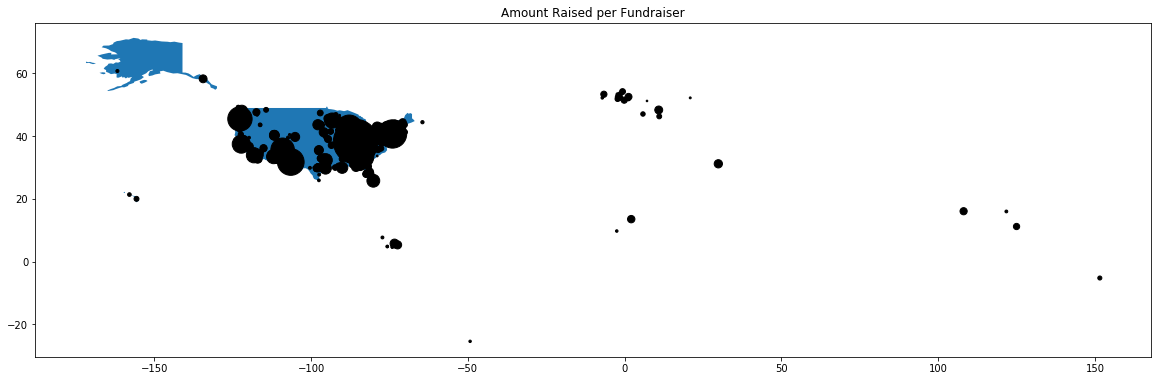

In [121]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = gdf['Amount_Raised'].max()
x_min = gdf['Amount_Raised'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')

